In [3]:
import cv2
import numpy as np


# Charger une image
image_path = 'img/img1.jpg'
image = cv2.imread(image_path)
# cv2.imshow('default Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


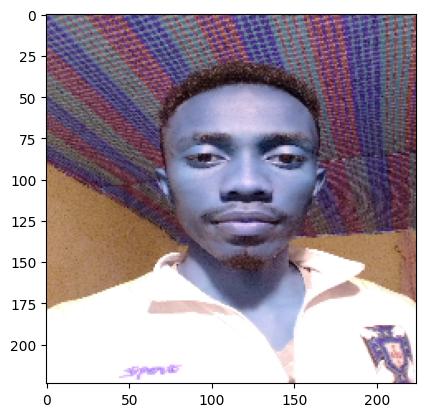

In [12]:
import matplotlib.pyplot as plt

# Redimensionner l'image à une taille spécifique
target_size = (224, 224)
resized_image = cv2.resize(image, target_size)
# cv2.imshow('resized Image', resized_image)

# Normaliser l'image (convertir les valeurs de pixel en [0, 1])
normalized_image = resized_image.astype(np.float32) / 255.0
# cv2.imshow('normalized Image', normalized_image)

# Augmentation des données - exemple de rotation aléatoire
# angle = np.random.randint(-10, 10)  # Angle de rotation aléatoire entre -10 et 10 degrés
# rows, cols, _ = normalized_image.shape
# rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
# augmented_image = cv2.warpAffine(normalized_image, rotation_matrix, (cols, rows))
# cv2.imshow('augmented Image', augmented_image)


# Conversion en niveaux de gris
# gray_image = cv2.cvtColor(normalized_image, cv2.COLOR_BGR2GRAY)
# cv2.imshow('gray Image', gray_image)


# Exemple de filtrage - filtre Gaussien pour réduire le bruit
# blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
# cv2.imshow('blurred Image', blurred_image)

# Affichage des images pour vérification (optionnel)
# cv2.imshow('Original Image', image)
# cv2.imshow('Preprocessed Image', gray_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.imshow(image)
plt.imshow(normalized_image)


In [21]:
# import cv2
from facenet_pytorch import MTCNN

# Initialiser le détecteur MTCNN
mtcnn = MTCNN()

# Charger l'image à traiter
image_path = 'img/img3.jpg'
image = cv2.imread(image_path)

# Convertir l'image de BGR à RGB (MTCNN utilise RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Détecter les visages dans l'image
boxes, probs = mtcnn.detect(image_rgb)

# Dessiner un rectangle autour de chaque visage détecté
if boxes is None or len(boxes) == 0:
    print("Aucun visage détecté.")
else:
    for box in boxes:
        x, y, w, h = box.astype(int)
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

# Créer une fenêtre redimensionnable
cv2.namedWindow('Faces Detected', cv2.WINDOW_NORMAL)
cv2.imshow('Faces Detected', image)

# Ajuster la fenêtre pour qu'elle s'adapte à l'image
cv2.resizeWindow('Faces Detected', image.shape[1], image.shape[0])


# Afficher l'image avec les visages détectés
cv2.waitKey(0)
cv2.destroyAllWindows()


Aucun visage détecté.


In [29]:
import cv2
import numpy as np
import os
from facenet_pytorch import InceptionResnetV1, MTCNN, extract_face
from PIL import Image

# Initialiser le modèle InceptionResnetV1 et MTCNN
model = InceptionResnetV1(pretrained='vggface2').eval()
mtcnn = MTCNN()

# Fonction pour extraire les embeddings faciaux
def extract_face_embeddings(face_image):
    # Convertir l'image en tensor
    tensor = mtcnn(face_image)
    if tensor is not None:
        # Passer l'image à travers le modèle
        embeddings = model(tensor.unsqueeze(0))
        return embeddings.detach().numpy()[0]
    return None

# Fonction pour lire une image à partir d'un chemin local
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    return image

# Fonction pour comparer les embeddings faciaux
def compare_embeddings(embedding1, embedding2, threshold=1.0):
    distance = np.linalg.norm(embedding1 - embedding2)
    return distance < threshold

# Exemple d'utilisation
def main():
    # Chemin de l'image à vérifier
    image_path = './babla.jpg'
    image = load_image(image_path)

    # Extraire les embeddings du visage de l'image à vérifier
    face_embedding = extract_face_embeddings(image)

    if face_embedding is not None:
        # Chemin du dossier contenant les images de la base de données d'utilisateurs
        user_images_dir = './img/'
        
        match_found = False

        for filename in os.listdir(user_images_dir):
            user_image_path = os.path.join(user_images_dir, filename)
            user_image = load_image(user_image_path)
            user_face_embedding = extract_face_embeddings(user_image)

            if user_face_embedding is not None:
                if compare_embeddings(face_embedding, user_face_embedding):
                    print(f"Correspondance trouvée avec l'image : {user_image_path}")
                    match_found = True
                    break

        if not match_found:
            print("Aucune correspondance trouvée.")
    else:
        print("Aucun visage détecté ou plusieurs visages détectés.")

if __name__ == "__main__":
    main()



Correspondance trouvée avec l'image : ./img/img1.jpg


In [31]:
import cv2
import numpy as np
import os
from facenet_pytorch import InceptionResnetV1, MTCNN, extract_face
from PIL import Image

# Initialiser le modèle InceptionResnetV1 et MTCNN
model = InceptionResnetV1(pretrained='vggface2').eval()
mtcnn = MTCNN()

# Fonction pour extraire les embeddings faciaux
def extract_face_embeddings(face_image):
    # Convertir l'image en tensor
    tensor = mtcnn(face_image)
    if tensor is not None:
        # Passer l'image à travers le modèle
        embeddings = model(tensor.unsqueeze(0))
        return embeddings.detach().numpy()[0]
    return None

# Fonction pour lire une image à partir d'un chemin local
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    return image

# Fonction pour comparer les embeddings faciaux
def compare_embeddings(embedding1, embedding2, threshold=1.0):
    distance = np.linalg.norm(embedding1 - embedding2)
    return distance < threshold

# Exemple d'utilisation
def main():
    # Chemin de l'image à vérifier
    image_path = './me.jpg'
    image = load_image(image_path)

    # Extraire les embeddings du visage de l'image à vérifier
    face_embedding = extract_face_embeddings(image)

    if face_embedding is not None:
        # Chemin du dossier contenant les images de la base de données d'utilisateurs
        # user_images_dir = './img/'
        
        match_found = False

        # for filename in os.listdir(user_images_dir):
        #     user_image_path = os.path.join(user_images_dir, filename)
        #     user_image = load_image(user_image_path)
        #     user_face_embedding = extract_face_embeddings(user_image)
        user_image_path = "./img/img1.jpg"
        user_image = load_image(user_image_path)
        user_face_embedding = extract_face_embeddings(user_image)

        if user_face_embedding is not None:
            if compare_embeddings(face_embedding, user_face_embedding):
                print(f"Correspondance trouvée avec l'image : {user_image_path}")
                
            else:
                print("Aucune correspondance trouvée.")
    else:
        print("Aucun visage détecté ou plusieurs visages détectés.")

if __name__ == "__main__":
    main()



Correspondance trouvée avec l'image : ./img/img1.jpg
